##  Neural Networking == Deep Learning 
### MLP = Multi layer perceptron

In [43]:
import mglearn1
from IPython.display import display, Image, set_matplotlib_formats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
mglearn1.plots.plot_logistic_regression_graph()

### Input layer , Hidden Layer and output layer
- At hidden layer - Apply Nonlinear funtion to the weighted sum such as relu (rectifying linear unit) or tanh (tangent hyperbolic)

## Activcation 
### Note from You Tube - Andrew Ng
### https://www.youtube.com/watch?v=LLux1SW--oM
- Instead of 0 and 1 , we can have many sub classes 

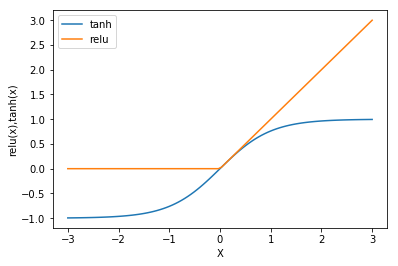

In [3]:
line = np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label='tanh')
plt.plot(line,np.maximum(line,0),label='relu')
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('relu(x),tanh(x)')

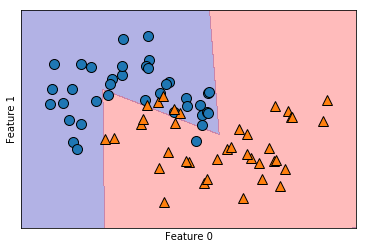

In [50]:
## Tuning Neural Network
# Working of MLP (Multi Layer Preciptron) using make moon data set
# Decision boundary to be learned by Neural Network with 100 hidden units on dataset
X,y = make_moons(n_samples=100,noise=0.25)
X_train,X_test,y_train,y_test= train_test_split(X,y,stratify=y,random_state=42)
mlp=MLPClassifier(solver='lbfgs',random_state=0,activation='relu',hidden_layer_sizes=[10]).fit(X_train,y_train)
mglearn1.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn1.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

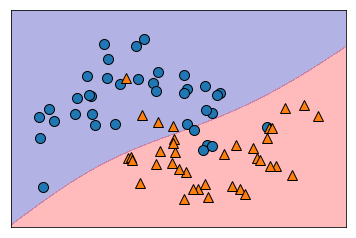

In [5]:
## Use activation = tanh, 2 hidden layers 
mlp=MLPClassifier(solver='sgd',hidden_layer_sizes=[10,10],activation='tanh',learning_rate_init=0.001,max_iter=1000,random_state=42).fit(X_train,y_train)
mglearn1.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn1.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

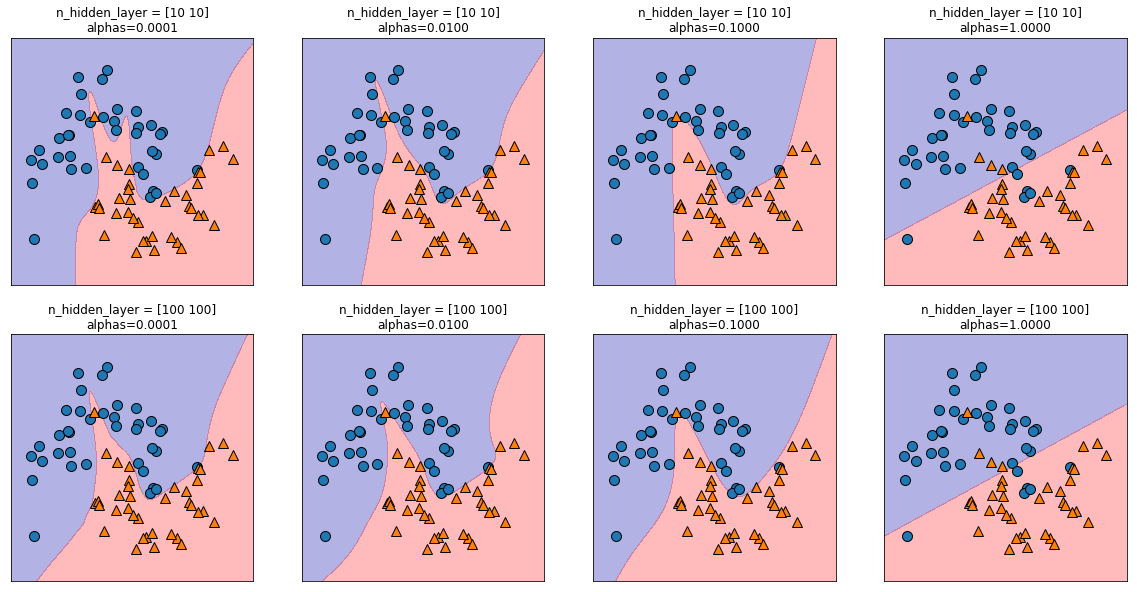

In [6]:
## Loop through hidden loops 10,100
fig,axes = plt.subplots(2,4,figsize=(20,10))
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[0.0001,0.01,0.1,1.0]):
        mlp=MLPClassifier(hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],activation='tanh',solver='lbfgs',
                          alpha=alpha,random_state=42).fit(X_train,y_train)
        mglearn1.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3,ax=ax)
        mglearn1.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title('n_hidden_layer = [{} {}]\nalphas={:.4f}'.format(n_hidden_nodes,n_hidden_nodes,alpha))
        

## Controlling parameters (Important) and Weights
- no of hidden layers, nodes in the hidden layers, alpha = regularization parameters ..or its learning rate
- Weights are set randomly , we can fix using random_seeds. Otherwise for same parameters we might get different models.
- But for large network this initialization of weights doesn't impact too much

### Weights are initialized randomly , Its quite possible to have different model with the same parameters ..But for large network should not matter too much 

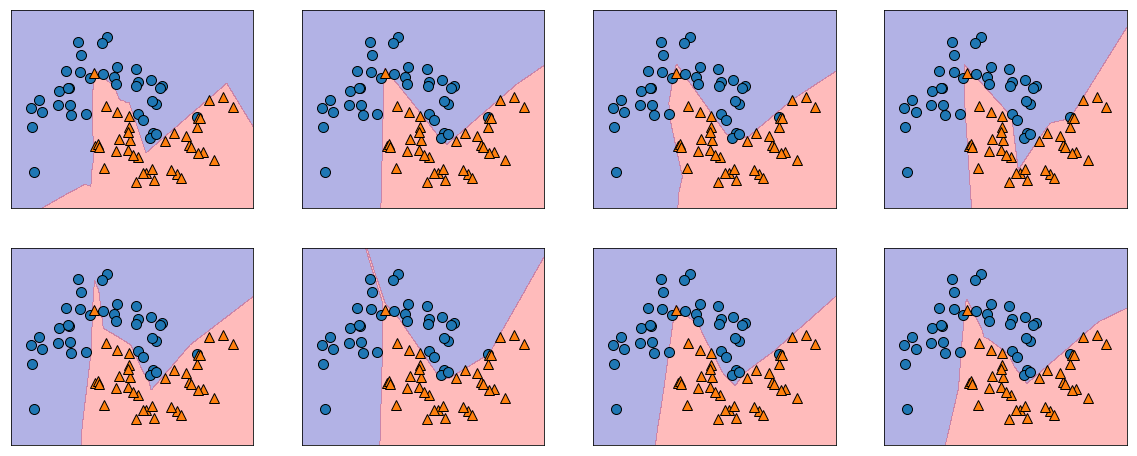

In [7]:
fig,axes = plt.subplots(2,4,figsize=(20,8))
for i, ax in enumerate(axes.ravel()):
    mlp=MLPClassifier(solver='lbfgs',random_state=i,hidden_layer_sizes=[10,10]).fit(X_train,y_train)
    mglearn1.plots.plot_2d_separator(mlp,X_train,ax=ax,alpha=0.3,fill=True)
    mglearn1.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
    
    

## Cancer Data 

In [8]:
import pandas as pd

In [9]:
from sklearn.datasets import load_breast_cancer

In [10]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
mlp=MLPClassifier(random_state=42).fit(X_train,y_train)
print('Accuracy on training set {:.2f}'.format(mlp.score(X_train,y_train)))
print('Accuracy on testing set {:.2f}'.format(mlp.score(X_test,y_test)))

Accuracy on training set 0.91
Accuracy on testing set 0.88


In [11]:
df_cancer=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
## Normalize and fit again
mean_on_train = X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)
X_train_scaled= (X_train - mean_on_train)/(std_on_train)
X_test_scaled= (X_test - mean_on_train)/(std_on_train)
mlp=MLPClassifier(random_state=0,solver='adam',max_iter=1500)
mlp.fit(X_train_scaled,y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [13]:
print('Training accuracy : {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('Testing accuracy : {:.3f}'.format(mlp.score(X_test_scaled,y_test)))

Training accuracy : 0.993
Testing accuracy : 0.972


## Difference between Training and Test result can be improved by tuning $\alpha$ parameter

In [14]:
mlp=MLPClassifier(random_state=0,alpha=1,max_iter=1500)
mlp.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [15]:
print('Training accuracy : {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('Testing accuracy : {:.3f}'.format(mlp.score(X_test_scaled,y_test)))

Training accuracy : 0.988
Testing accuracy : 0.972


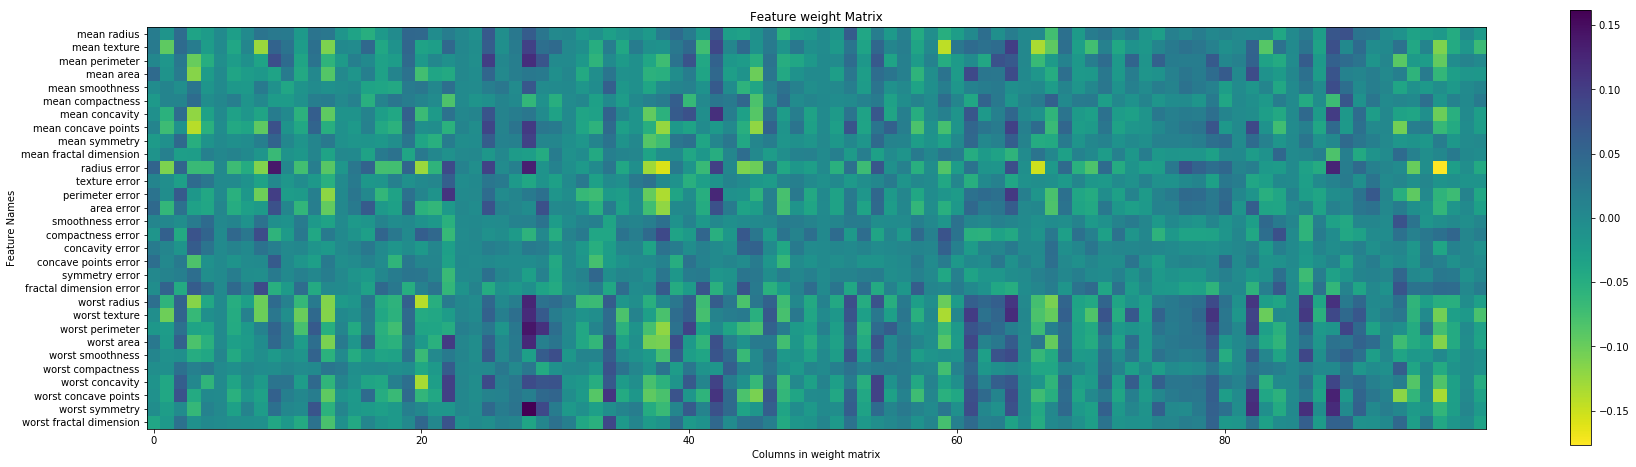

In [16]:
plt.figure(figsize=(30,8))
plt.imshow(mlp.coefs_[0],interpolation=None,cmap='viridis_r')
plt.xlabel('Columns in weight matrix')
plt.ylabel('Feature Names')
plt.title('Feature weight Matrix')
plt.yticks(range(30),cancer.feature_names)
plt.colorbar()

## For Deep Learning Libraries (Beyond Scikit-Learn) : KERAS, LASAGNA, TENSOR-FLOW

## Strengths, Weakness, and Parameters
- Capture information in the large dataset 
- Build Incredibly complex model
- Beat other ML algorithm if given enough computation time, data and tuned up parameters
### Weakness
- Long time train (usually we use NN for large and complex data 
- Like SVM works best with HOMOGENEOUS data (All features have similar meaning)
- Data for different kind of FEATURES --> TREE based model might work better
<span style='color:red'>
### How to build the model
</span>
- Take hidden layer and nodes to an extent it is overfit
- Then shrink the layers, nodes or increase REGULARIZATION parameter ($\alpha$) to improve GENERALIZATION
<span style='color:green'>
### Algorithms
- adam (default) - works fine with large dataset
- lbfgs - Takes time to train large dataset
- bfgs
- sgd - Mostly used is deep learning , comes with many additional parameters
</span>

## Uncertainty Estimates from Classifiers 
- Most algorithms have decision_function and predict_prob
- Gives estimates for the truthness of test data classification

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs,make_circles

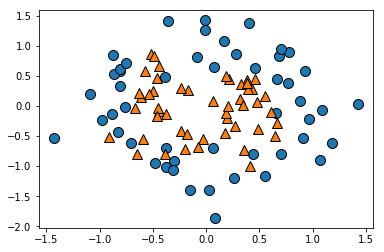

In [18]:
X,y=make_circles(noise=0.25,factor=0.5,random_state=0)
mglearn1.discrete_scatter(X[:,0],X[:,1],y)

In [19]:
y_named=np.array(['blue','red'])[y]
X_train,X_test,y_named_train,y_named_test,y_train,y_test=train_test_split(X,y_named,y,random_state=0)

In [20]:
# Build the gradient boosting model
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_named_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

<span style='color:red'>
### Decision Function
</span>

In [21]:
gbrt.decision_function(X_test)[:6]

array([-1.84454647,  4.79276718, -4.46365022, -4.46365022,  4.86060642,
       -4.26007857])

In [22]:
gbrt.score(X_train,y_named_train)

1.0

In [23]:
print('Threshold decsion function :\n{}'.format(gbrt.decision_function(X_test)>0))
print('Prediction :\n{}'.format(gbrt.predict(X_test)))

Threshold decsion function :
[False  True False False  True False False  True False  True False False
  True False  True  True False False  True  True False  True  True  True
 False]
Prediction :
['blue' 'red' 'blue' 'blue' 'red' 'blue' 'blue' 'red' 'blue' 'red' 'blue'
 'blue' 'red' 'blue' 'red' 'red' 'blue' 'blue' 'red' 'red' 'blue' 'red'
 'red' 'red' 'blue']


In [24]:
gbrt.classes_

array(['blue', 'red'], 
      dtype='<U4')

In [25]:
greater_zero=(gbrt.decision_function(X_test)>0).astype(int)
pred=gbrt.classes_[greater_zero]
## Pred is used same as output of Prediction
print('Pred is equal to predictions: {}'.format(np.all(pred==gbrt.predict(X_test))))

Pred is equal to predictions: True


## <span style='color:red'> Note: </span>
- Range of decision function is arbtrary. It depends upon the data values and parameters

In [26]:
print('Decison function - Max and Min: {:.2f} and {:.2f}'.format(np.max(gbrt.decision_function(X_test)),
                                                          np.min(gbrt.decision_function(X_test))))

Decison function - Max and Min: 4.86 and -6.36


In [27]:
getattr(gbrt,'decision_function')(X_test)

array([-1.84454647,  4.79276718, -4.46365022, -4.46365022,  4.86060642,
       -4.26007857, -5.53240559,  4.44280467, -1.40571578,  4.79276718,
       -0.35673277, -4.11994336,  4.86060642, -3.68180923,  4.86060642,
        4.79276718, -6.35564799, -5.92414726,  2.67051862,  4.79276718,
       -3.30431728,  3.96888163,  4.79276718,  3.55688991, -3.613591  ])

In [28]:
gbrt.decision_function(X_test)

array([-1.84454647,  4.79276718, -4.46365022, -4.46365022,  4.86060642,
       -4.26007857, -5.53240559,  4.44280467, -1.40571578,  4.79276718,
       -0.35673277, -4.11994336,  4.86060642, -3.68180923,  4.86060642,
        4.79276718, -6.35564799, -5.92414726,  2.67051862,  4.79276718,
       -3.30431728,  3.96888163,  4.79276718,  3.55688991, -3.613591  ])

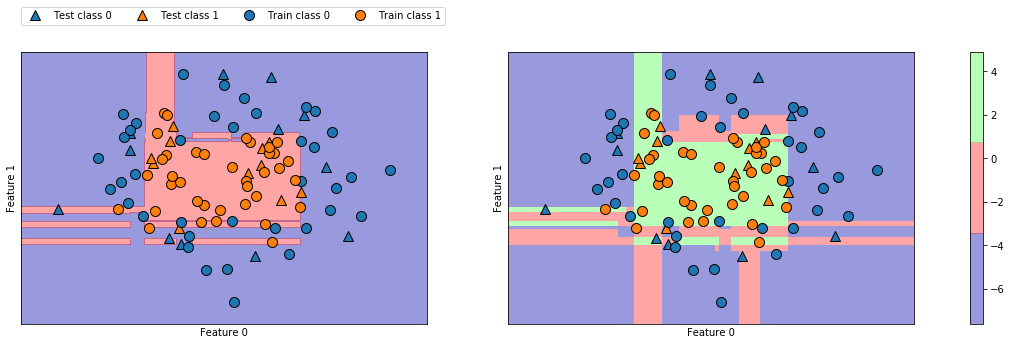

In [29]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
mglearn1.tools.plot_2d_separator(gbrt,X,ax=axes[0],fill=True,alpha=0.4,cm=mglearn1.cm2)
source_image= mglearn1.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=0.4,cm=mglearn1.cm3)

for ax in axes:
    # plot traiing and test points
    mglearn1.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn1.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
cbar=plt.colorbar(source_image,ax=axes.tolist())
axes[0].legend(['Test class 0','Test class 1','Train class 0','Train class 1'],ncol=4,loc=(0,1.1))


## <span style='color:brown'> Predicting Probability </span>

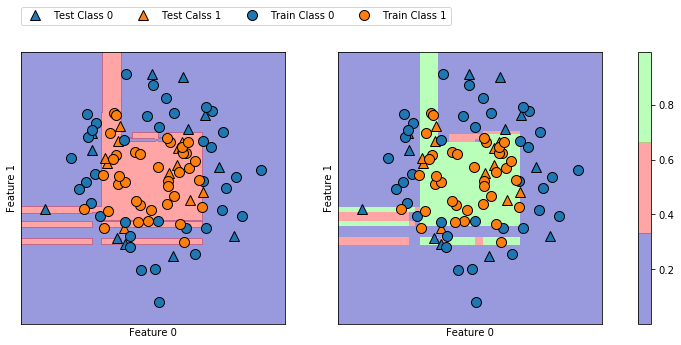

In [30]:
## Repeat the same script as before but using prob predict this time
## We get the probability of each point for POSITIVE , take class from the 2nd index
fig,axes = plt.subplots(1,2,figsize=(13,5))
#1 : Plot for separator
mglearn1.tools.plot_2d_separator(gbrt,X,ax=axes[0],fill=True,alpha=0.4,cm=mglearn1.cm2)
#2 : Plot for Probability function - a. Derive the probability for meshgrid b. plot using imshow with colorbar
scores_image=mglearn1.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=0.4,function='predict_proba',cm=mglearn1.cm3)
#3 : Plot discrete values (training and test results)
for ax in axes:
    mglearn1.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn1.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
cbar = plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(['Test Class 0','Test Calss 1','Train Class 0','Train Class 1'],ncol=4,loc=(0,1.1))

## <span style='color:red'>Uncertainty of Multiclass Classification</span>
- Decision function has the size dimension of (n_sample,classes) as compared to binary (n_sample only)
- Probability has same dimension as n_sample X Classes
- Lets use IRIS Dataset
- Each column provides the CERTAINTY SCORE , Large Score means class is more likely and less means less likely

In [31]:
from sklearn.datasets import load_iris

In [32]:
iris= load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=42)

In [33]:
gbrt=GradientBoostingClassifier(learning_rate=0.01,random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [34]:
gbrt.decision_function(X_test).shape
gbrt.decision_function(X_test)[:6]

array([[-0.52931069,  1.46560359, -0.50448467],
       [ 1.51154215, -0.49561142, -0.50310736],
       [-0.52379401, -0.4676268 ,  1.51953786],
       [-0.52931069,  1.46560359, -0.50448467],
       [-0.53107259,  1.28190451,  0.21510024],
       [ 1.51154215, -0.49561142, -0.50310736]])

In [35]:
## How to recover the PREDICTION
print('Predict class # using decsion Function :\n{}'.format(np.argmax(gbrt.decision_function(X_test),axis=1)))
print('Prediction using the predict method :\n{}'.format(gbrt.predict(X_test)))

Predict class # using decsion Function :
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Prediction using the predict method :
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [36]:
## Use Predict Probability - Predict prob
print('Prediction using probability :\{}'.format(np.argmax(gbrt.predict_proba(X_test),axis=1)))

Prediction using probability :\[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


## <span style='color:green'>Using named class <span>

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logrec = LogisticRegression()

In [39]:
named_target=iris.target_names[y_train]
logrec.fit(X_train,named_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
print('Unique classes in the set:{}'.format(logrec.classes_))

Unique classes in the set:['setosa' 'versicolor' 'virginica']


In [41]:
test_output=np.argmax(logrec.decision_function(X_test),axis=1)

In [42]:
logrec.classes_[test_output][:10]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor'], 
      dtype='<U10')